In [1]:
# importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import requests
from matplotlib.backends.backend_pdf import PdfPages


In [25]:
# Paleta Chikungunya
paleta_chikungunya = ['firebrick', 'maroon', 'rosybrown', 'lightcoral', 'darksalmon', 'coral', 'red', 'peachpuff']

In [26]:
# Aplique globalmente (opcional)
sns.set_palette(paleta_chikungunya)

CASOS DE CHIKUNGUNYA POR ANO (2017-2024)

In [11]:
chikungunya_casos_por_ano = pd.read_csv('chikungunya_casos_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
chikungunya_casos_por_ano.head()

,UF de notificação,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,11 Rondônia,863,464,578,1077,433,544,984,1971,6914
1,12 Acre,363,640,151,274,667,222,304,623,3244
2,13 Amazonas,601,205,207,123,370,478,582,335,2901
3,14 Roraima,6760,508,514,151,341,447,504,529,9754
4,15 Pará,11869,12348,6275,1953,947,1625,2375,6304,43696


In [5]:
chikungunya_casos_por_ano.to_excel('planilha_casos_chikungunya.xlsx')

In [12]:
# Removendo a linha 'Total'
chikungunya_casos_por_ano.drop((27), inplace=True)

In [13]:
# Removendo a coluna 'Total'
chikungunya_casos_por_ano.drop(columns=['Total'], inplace=True)

In [22]:
# Verificando os tipos de caada coluna
chikungunya_casos_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UF de notificação  27 non-null     object
 1   2017               27 non-null     int64 
 2   2018               27 non-null     int64 
 3   2019               27 non-null     int64 
 4   2020               27 non-null     int64 
 5   2021               27 non-null     int32 
 6   2022               27 non-null     int32 
 7   2023               27 non-null     int32 
 8   2024               27 non-null     int32 
dtypes: int32(4), int64(4), object(1)
memory usage: 1.6+ KB


In [15]:
colunas_converter = ['2021', '2022', '2023', '2024']
chikungunya_casos_por_ano[colunas_converter] = chikungunya_casos_por_ano[colunas_converter].apply(pd.to_numeric, errors='coerce').fillna(0)

In [18]:
# Convertendo as colunas para inteiros
chikungunya_casos_por_ano[colunas_converter] = chikungunya_casos_por_ano[colunas_converter].astype(int)

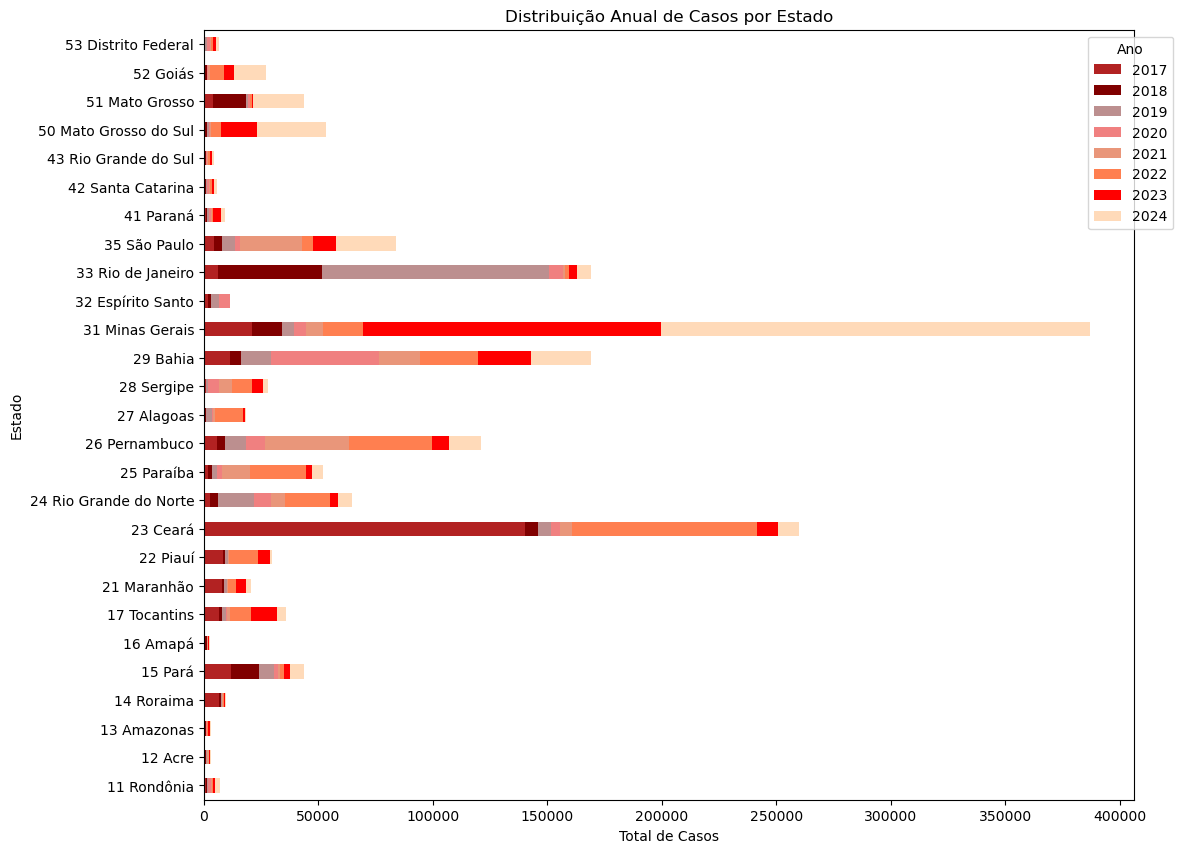

In [27]:
chikungunya_casos_por_ano.set_index('UF de notificação').plot(kind='barh', stacked=True, figsize=(12, 10))
plt.title('Distribuição Anual de Casos por Estado')
plt.xlabel('Total de Casos')
plt.ylabel('Estado')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))

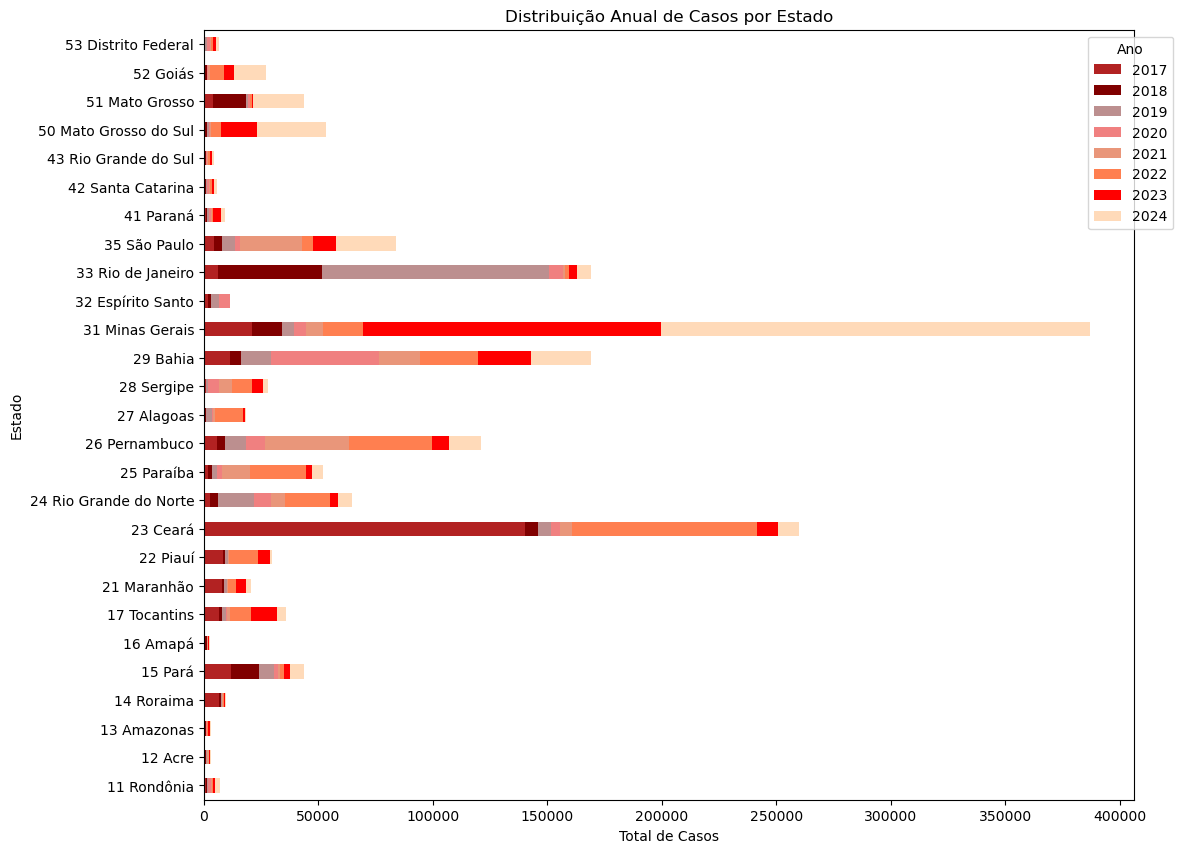

In [28]:
with PdfPages('chikungunya_casos_por_ano.pdf') as pdf:
    chikungunya_casos_por_ano.set_index('UF de notificação').plot(kind='barh', stacked=True, figsize=(12, 10))
    plt.title('Distribuição Anual de Casos por Estado')
    plt.xlabel('Total de Casos')
    plt.ylabel('Estado')
    plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))
    pdf.savefig()

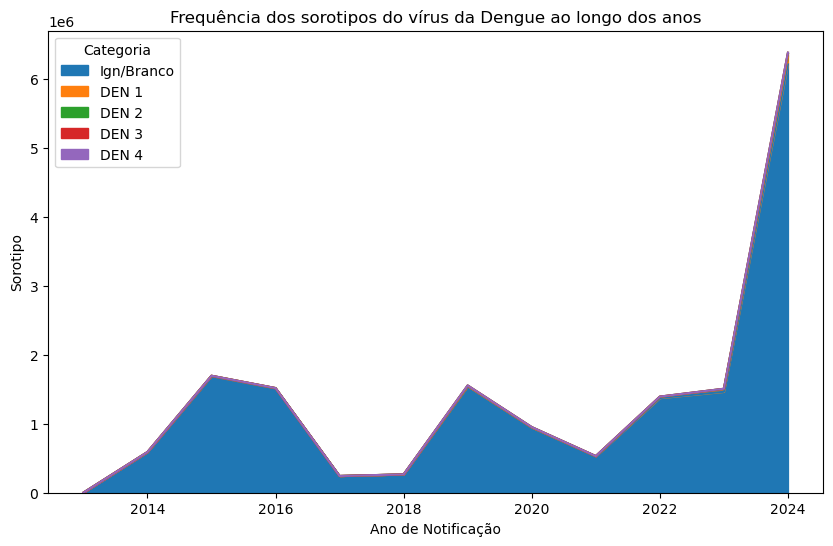

In [ ]:
dengue_sorotipo_por_ano.groupby('Ano notificação').sum().plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Frequência dos sorotipos do vírus da Dengue ao longo dos anos')
plt.xlabel('Ano de Notificação')
plt.ylabel('Sorotipo')
plt.legend(title='Categoria')
plt.show()

EVOLUÇÃO DOS CASOS DE CHIKUNGUNYA POR ANO

In [10]:
chikungunya_evolucao_por_ano = pd.read_csv('chikungunya_evolucao_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
chikungunya_evolucao_por_ano.head()

,Ano notificação,Ign/Branco,Cura,Óbito pelo agravo notificado,Óbito por outras causas,Óbito em investigação,Total
0,2017,36145,210857,263,383,44,247692
1,2018,27117,91206,91,325,26,118765
2,2019,60740,117322,101,301,36,178500
3,2020,39384,62476,30,165,21,102076
4,2021,37527,91281,16,153,12,128989


In [12]:
# Removendo a linha 'Total'
chikungunya_evolucao_por_ano.drop((8), inplace=True)

In [13]:
# Removendo a coluna 'Total'
chikungunya_evolucao_por_ano.drop(columns=['Total'], inplace=True)

In [14]:
# Verificando os tipos de caada coluna
chikungunya_evolucao_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ano notificação               8 non-null      object
 1   Ign/Branco                    8 non-null      int64 
 2   Cura                          8 non-null      int64 
 3   Óbito pelo agravo notificado  8 non-null      int64 
 4   Óbito por outras causas       8 non-null      int64 
 5   Óbito em investigação         8 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 516.0+ bytes


In [ ]:
chikungunya_casos_por_ano = chikungunya_casos_por_ano.copy().apply(pd.to_numeric, errors='coerce').fillna(0)

In [ ]:
# Verifique se há decimais (valores não inteiros)
print(chikungunya_casos_por_ano.apply(lambda x: x % 1 != 0).any())

Ano notificação    False
Ign/Branco         False
DEN 1              False
DEN 2              False
DEN 3              False
DEN 4              False
dtype: bool


In [ ]:
# Convertendo todas as colunas para inteiros
chikungunya_casos_por_ano = chikungunya_casos_por_ano.copy().astype(int)

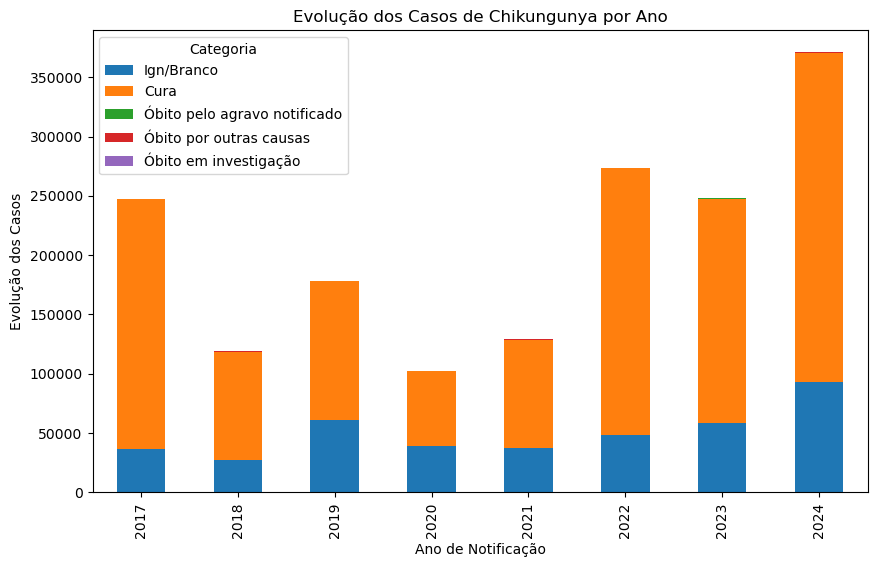

In [16]:
chikungunya_evolucao_por_ano.groupby('Ano notificação').sum().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Evolução dos Casos de Chikungunya por Ano')
plt.xlabel('Ano de Notificação')
plt.ylabel('Evolução dos Casos')
plt.legend(title='Categoria')
plt.show()

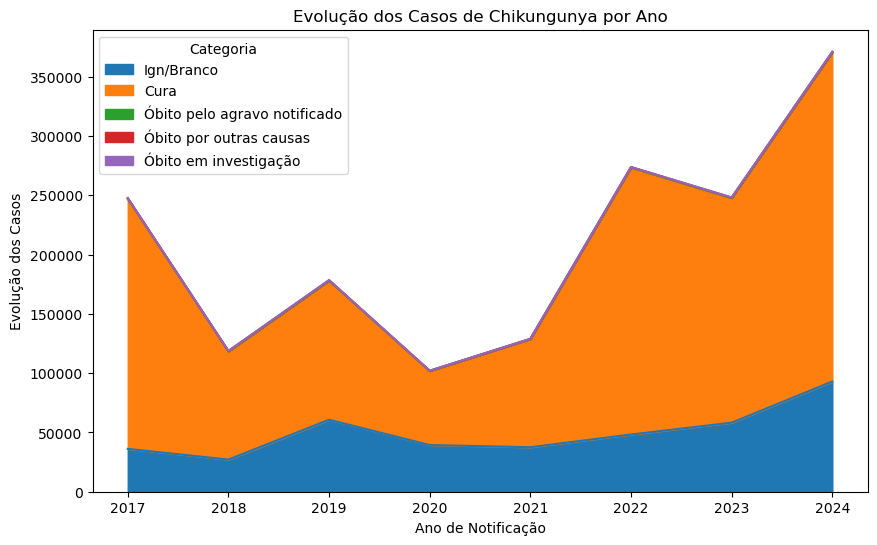

In [18]:
chikungunya_evolucao_por_ano.groupby('Ano notificação').sum().plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Evolução dos Casos de Chikungunya por Ano')
plt.xlabel('Ano de Notificação')
plt.ylabel('Evolução dos Casos')
plt.legend(title='Categoria')
plt.show()

In [19]:
chikungunya_evolucao = pd.read_csv('chikungunya_evolucao_2017-2024.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
chikungunya_evolucao.head()

,UF de notificação,Ign/Branco,Cura,Óbito pelo agravo notificado,Óbito por outras causas,Óbito em investigação,Total
0,11 Rondônia,1086,5781,-,46,1,6914
1,12 Acre,1708,1531,-,4,1,3244
2,13 Amazonas,653,2220,1,27,-,2901
3,14 Roraima,740,9001,-,8,5,9754
4,15 Pará,14835,28816,6,36,3,43696
